# Student Exam Performance EDA

The dataset consists of student exam performance records across multiple subjects.

## Part 1: Data Cleaning and Preparation

Before any analysis can be done, the data must be inspected and "gotten familiar with." This will include . . .
* Checking for missing or null values in each column
* Checking the data types of each column
* Changing column names as needed
* Checking for and correcting inconsistencies in the data

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# read in csv

df = pd.read_csv('StudentsPerformance.csv')

In [3]:
# examine the first 5 rows

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The columns are . . .
* `gender`: Is the student male or female?
* `race/ethnicity`: The race/ethnicity of the student, expressed by breaking the different races into groups with a corresponding letter.
* `parental level of education`: The highest level of education achieved by the parent of each student.
* `lunch`: Which type of lunch does the student receive at school?
* `test preparation course`: Did the student complete a test prep course before taking the exam?
* `math score`: The student's exam score on the math exam.
* `reading score`: The student's exam score on the reading exam.
* `writing score`: The student's exam score on the writing exam.

In [4]:
# exploring the data types and seeing if any of the values are null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None of the rows have missing/null values. The data types for each column are correct, though `parental level of education` could be changed to an ordered category.

In [5]:
# cleaning up column names

df = df.rename(columns={'race/ethnicity': 'race',
                       'parental level of education' : 'parent_edu',
                       'test preparation course' : 'test_prep',
                       'math score' : 'math_score',
                       'reading score' : 'reading_score',
                       'writing score' : 'writing_score'})

df.head()

,gender,race,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# what are the distinct entries in each column?
# particularly interested in the columns containing strings

print('UNIQUE VALUES BY COLUMN\n')
print(df.gender.unique())
print(df.race.unique())
print(df.parent_edu.unique())
print(df.lunch.unique())
print(df.test_prep.unique())

UNIQUE VALUES BY COLUMN

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


There are no inconsistencies in the entries for each column (no capitalization, spelling, or other errors). I personally would like to rename the entries in the `race` column to just be the letter corresponding with the group. I also would prefer if the `test_prep` column simply displayed 'yes' or 'no'.

In [7]:
# rename values in race column with just the letter

df = df.replace('group A', 'A')
df = df.replace('group B', 'B')
df = df.replace('group C', 'C')
df = df.replace('group D', 'D')
df = df.replace('group E', 'E')

# rename values in test_prep with yes or no

df = df.replace('none', 'no')
df = df.replace('completed', 'yes')

print(df.race.unique())
df.head()

['B' 'C' 'A' 'D' 'E']


,gender,race,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,B,bachelor's degree,standard,no,72,72,74
1,female,C,some college,standard,yes,69,90,88
2,female,B,master's degree,standard,no,90,95,93
3,male,A,associate's degree,free/reduced,no,47,57,44
4,male,C,some college,standard,no,76,78,75


In [8]:
# changing the data type of parent_edu to an ordered category

order = ['some high school',
         'high school',
         'some college',
         "associate's degree",
         "bachelor's degree",
         "master's degree"]

df.parent_edu = df.parent_edu.astype('category')
df.parent_edu = df.parent_edu.cat.set_categories(order, ordered=True)

df.parent_edu.unique().sort_values()

['some high school', 'high school', 'some college', 'associate's degree', 'bachelor's degree', 'master's degree']
Categories (6, object): ['some high school' < 'high school' < 'some college' < 'associate's degree' < 'bachelor's degree' < 'master's degree']

In [9]:
# checking the summary stats
# to see if any exam scores are strange

print(df.math_score.describe())
print('')
print(df.reading_score.describe())
print('')
print(df.writing_score.describe())

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64


None of the scores appear to be too extreme, or out of bounds. The max of 100 for all of the scores checks out. At least one student received a 0 on the math test, which may be correct, but could indicate a data entry error.

## Part 2: Data Exploration

Now that the data has been cleaned and inspected, some simple visualizations will be created to discover what stories the data has to tell. With each visualization, I will also be providing explanations to describe what I see the data is telling us.

I'll first begin with the categorical data.

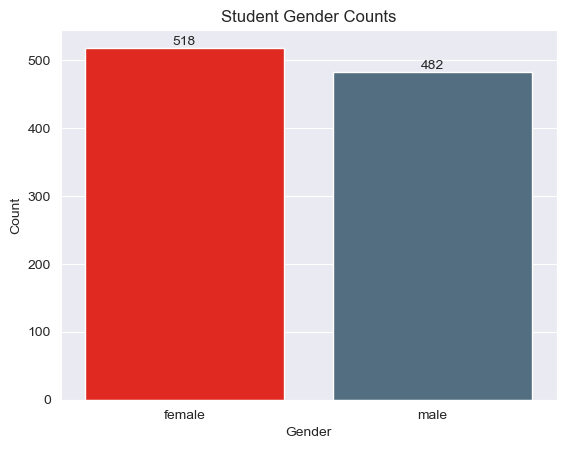

<Figure size 640x480 with 0 Axes>

In [10]:
# create a bar plot to display
# the number of males and females

ax = sns.countplot(x='gender', data=df, palette=['#FF0C01', '#4B6F89'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Student Gender Counts')
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

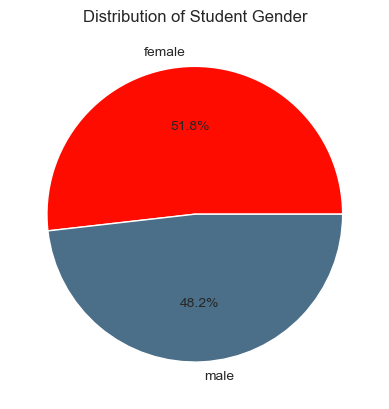

<Figure size 640x480 with 0 Axes>

In [11]:
# create a pie chart to display
# the proportion of students by gender

df.gender.value_counts().plot.pie(colors=['#FF0C01', '#4B6F89'], autopct='%1.1f%%')
plt.title('Distribution of Student Gender')
plt.ylabel('')
plt.show()
plt.clf()

Visually, it's clear that the student data is nearly evenly split between male and female, with females having a slight majority.

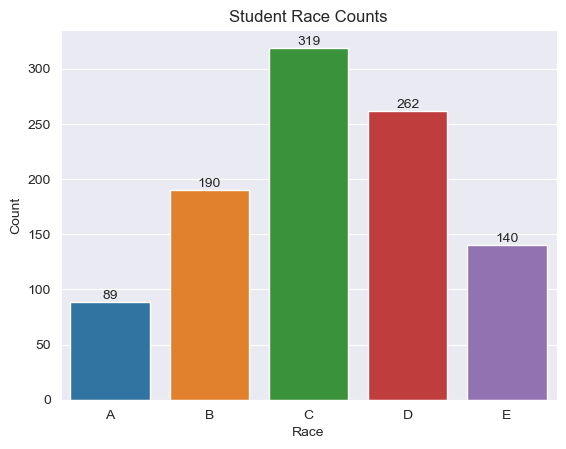

<Figure size 640x480 with 0 Axes>

In [12]:
# create a bar plot to display
# the numbers of races by group

ax = sns.countplot(x='race', data=df, order=['A', 'B', 'C', 'D', 'E'])
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Student Race Counts')
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

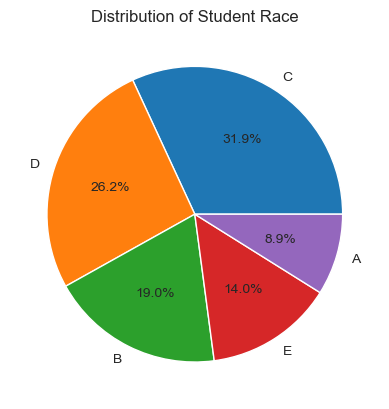

<Figure size 640x480 with 0 Axes>

In [13]:
# create a pie chart to display
# the proportion of students by gender

df.race.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Student Race')
plt.ylabel('')
plt.show()
plt.clf()

The student races are not evenly distributed. A is considerably underrepresented among the other four. The lack of representation could cause some skew to their scores if there are really high or low scores.

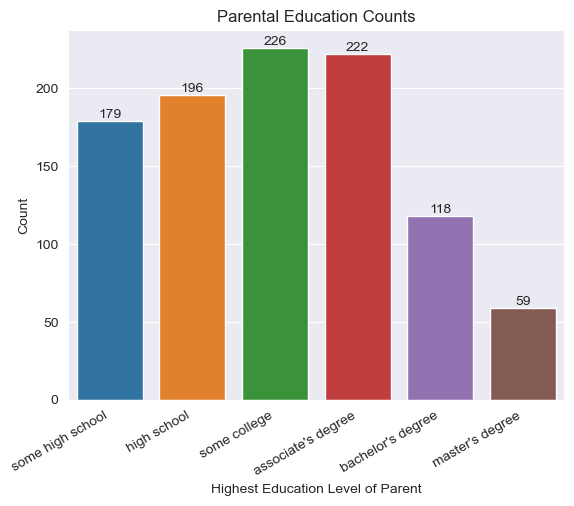

<Figure size 640x480 with 0 Axes>

In [14]:
# create a bar plot to display
# the numbers of parental education

ax = sns.countplot(x='parent_edu', data=df)
plt.xlabel('Highest Education Level of Parent')
plt.ylabel('Count')
plt.title('Parental Education Counts')
plt.xticks(rotation=30, ha='right')
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

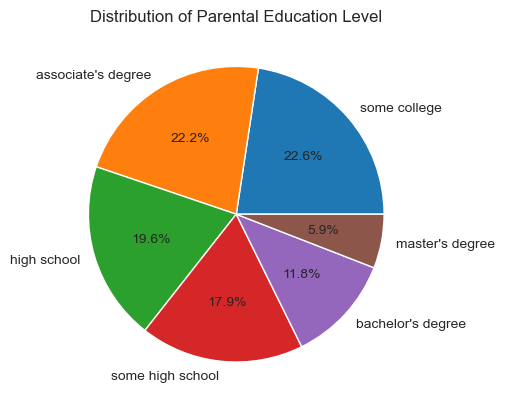

<Figure size 640x480 with 0 Axes>

In [15]:
df.parent_edu.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Parental Education Level')
plt.ylabel('')
plt.show()
plt.clf()

Before discussing the results, I wanted to explain how I am interpretting some of the category values because they were not explicitly . . .
* `some high school` indicates to me that the parent attended high school, but did not finish and/or obtain a diploma, or some high school diploma equivalency like a GED.
* `some college` indicates to me that the parent attended college, but did not finish and/or obtain a diploma.

The different levels of education are fairly evenly distributed among the first four categories (`some high school`, `high school`, `some college`, and `associate's degree`). The counts/proportions dip fairly significantly for `bachelor's degree` and `master's degree`. We have some sub-categories present here: Having a college degree vs. not having a college degree. 60\% of parents in the sample do not have a college degree (implying 40\% of parents in the sample do have college degrees of some form).